# Regression trees

In a previous notebook, you learned about decision trees which are used to predict a class label.
In this notebook, we will see how the decision trees can be used to make numeric predictions.
This method is known as *regression trees*.

Both methods partition a data set based on criteria of different variables (features) which can be categorical and/or numeric, and both methods have a tree structure.
We'll first begin with a a complete example of regression trees without code and then break the example down with code.

## Basics of Regression Trees

Unlike multiple regression, which assumes the relationship between response and features is linear, regression trees make no assumptions about the relationship between response and features.
In other words, regression trees are non-parametric models. 
This makes regression trees particularly useful when the relationship between response and features is non-linear and difficult to specify.

The figure below is an example of a regression tree.
In this model, baseball players salaries are predicted based on how long they have been playing and the number of hits the player had in the previous season.
Because the salaries of some baseball players can be much larger than the majority of the players (i.e.
the salaries have outliers), we use a transformation and look at the log of the salaries.

<!--  ![](HittersPrune){width="12cm"} -->
<!-- 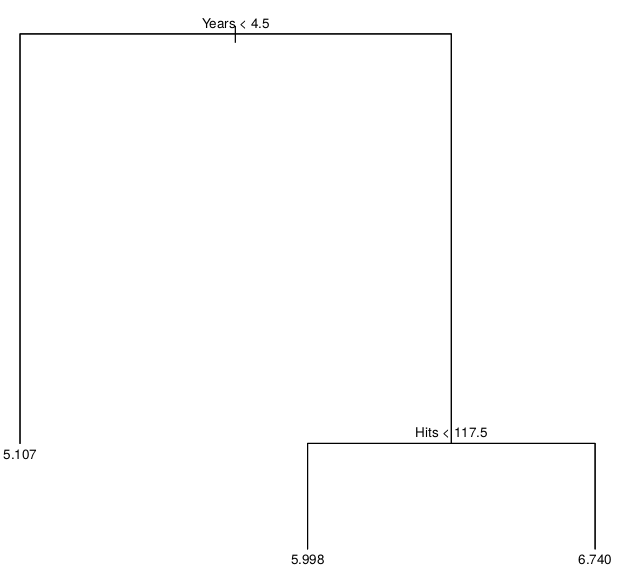 -->
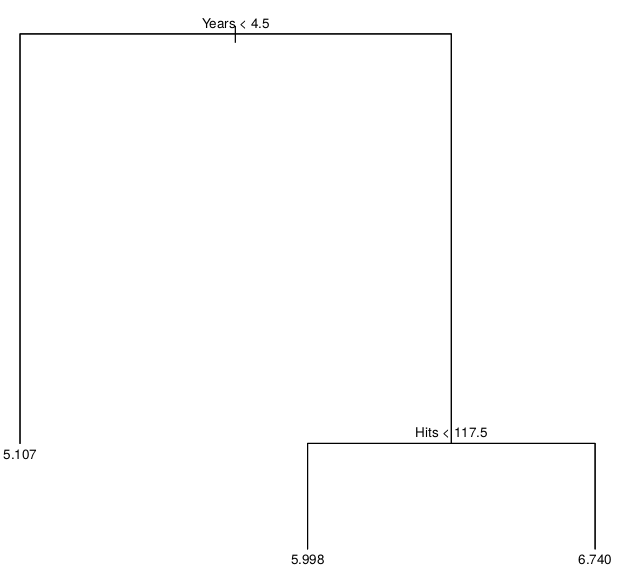
<center><b>Figure 1</b></center>

In this tree, the first partition is based on whether the player has been playing less than 4.5 years (left branch) or greater than or equal to 4.5 years (right branch).
For players who have been playing less than 4.5 years, the number of hits is not useful in predicting their salary. Their salary is predicted by averaging all the salaries of players with years &lt; 4.5.
This number is shown at the leaf of this branch and is 5.107.
Remember this is the log of the salary (in thousands of dollars) and so the predicted salary is $1000*e^{5.107} = \$ 165,174$.

 For the players that have been playing for longer than 4.5 years, the variable *Hits* further distinguishes the predicted salary.
For those with hits below 117.5, the predicted log salary, 5.998, is found as the average log salary of all players who have both $ Years \ge 4.5$ and $Hits < 117.5$.

<!--  ![](regPlot){width="12cm"} -->
<!-- 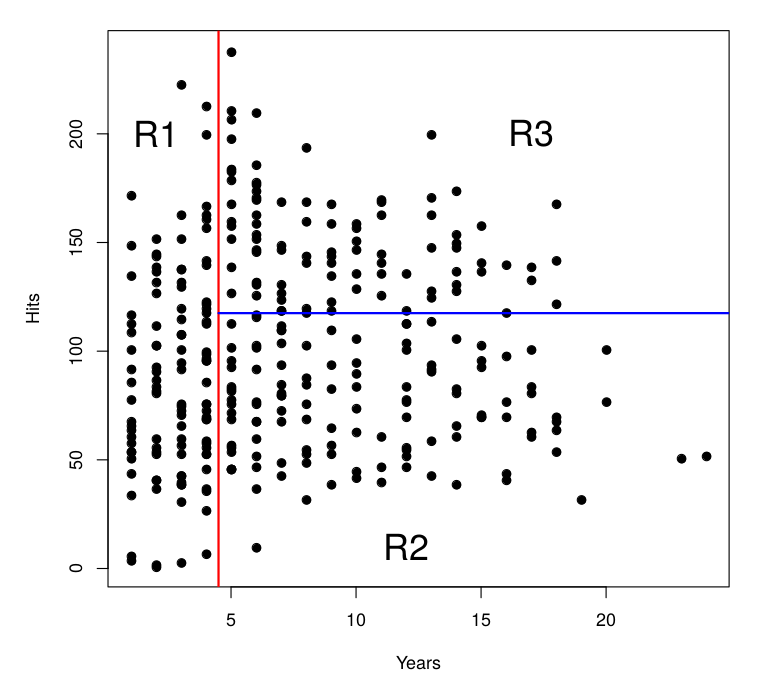 -->
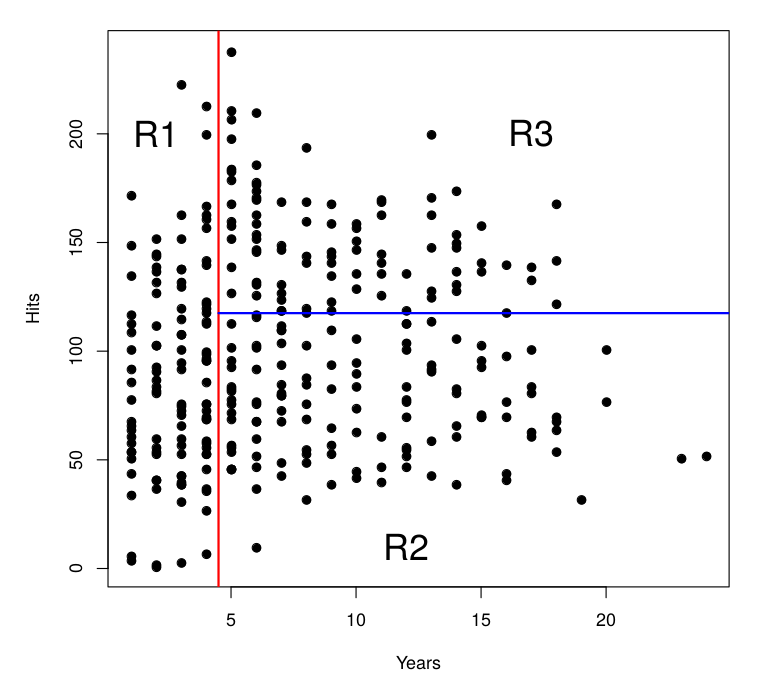
<center><b>Figure 2</b></center>

The regression tree can be visualized as in the plot in Figure 2.
This kind of plot is sometimes called a *decision surface* and is way of visualizing a tree on top of a scatterplot of the data.
The region *R1* corresponds to all players who have been playing less than 4.5 years.
The average of the log salaries in region R1 is the predicted value shown in the leftmost leaf of the tree in Figure 1, 5.107.
The three regions can be summarized as

 -   R1: X | Years &lt;4.5

 -   R2: X | Years $\ge$ 4.5, Hits &lt; 117.5

 -   R3: X | Years $\ge$ 4.5, Hits $\ge$ 117.5
 
Thus each region corresponds to a leaf in Figure 1.

## How are regression trees made?

 The algorithm that creates the tree partitions the set of features into $J$ distinct and non-overlapping regions, $R_1, R_2, \ldots, R_J$.
The predicted response in region $R_i$ is then the **mean** (arithmetic average) of the responses in that region.
The regions are defined to be rectangles (or higher-dimension boxes) for simplicity.
The regions are chosen to minimize the **sum of the squared differences** between each observed response and the predicted response (like linear regression).
It is not computationally possible to look at all possible partitions, so the regression tree is constructed using *recursive binary splitting*, which means that at each split, the tree branches into two parts choosing the best split (in terms of the sum of squared differences).

## Pruning

 The tree shown in Figure 1 is actually derived from another tree by *pruning*.
It is a tree that has been pruned to have only three nodes.
A bigger tree is shown in the figure below.
This tree has eight nodes rather than three and the prediction of salary is seen to be a bit more complex than the previous tree.

<!--  ![](treefit){width="12cm"} -->
<!-- 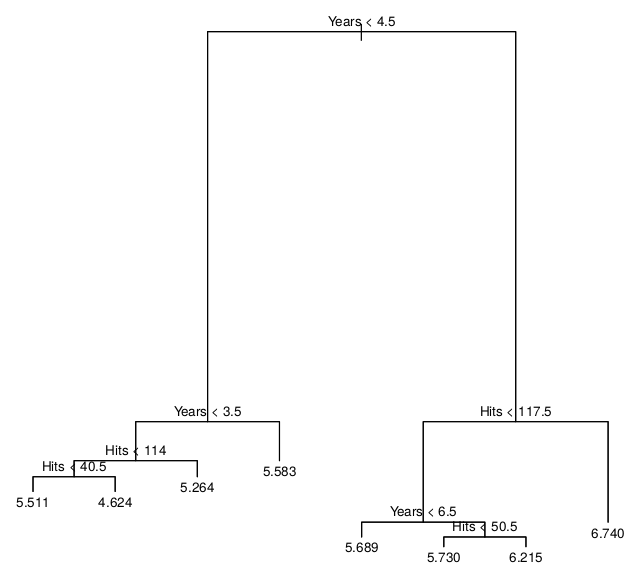 -->
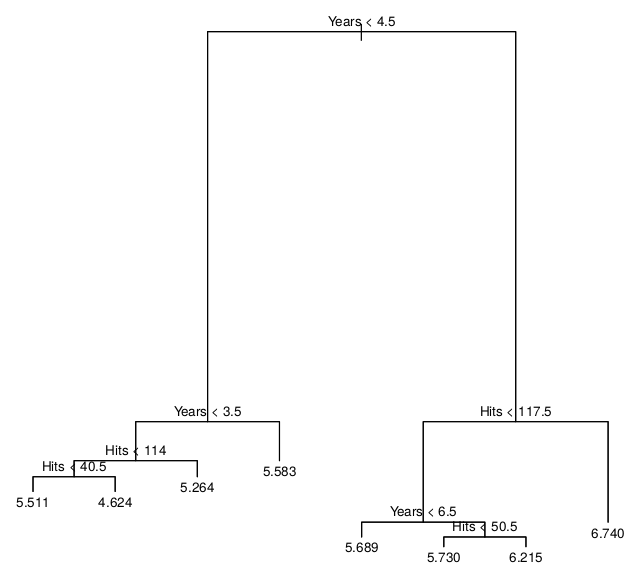
<center><b>Figure 3</b></center>

It is often a good idea to start with a big tree and use some systematic methods to prune the tree to an acceptable or optimal level.
Pruning is the same idea as regularization, which we talked about with lasso and ridge regression.
There are algorithms similar to the Lasso that can be used to find a good pruning (called a *subtree*) for our regression tree that *penalizes* the sum of squared errors for having more nodes.
For example, if you have the number of nodes equal to the number of data points with one point per node, your sum of squared errors would be zero since the predicted value would equal the observed value for all nodes.
But this would not be very good for prediction of a new data point.
Ideally we would like to have enough nodes (leaves) so that the responses within each leaf are closely spaced and the regression surface is nearly constant.

## Summary

 Some of the advantages of regression trees are summarized here.

 -   Making predictions is fast - you just look up the constants in the tree.

 -   It is easy to see what variables are most important in making the predictions.

 -   If some data is missing and we can’t get all the way to a leaf, we can still make a prediction by averaging all the leaves in the subtree we can reach.

 -   The model works well for non-linear relationships and for linear relationships.

 -   The trees can be built quickly using computer algorithms. 

## Example: Baseball